# IUCN Exploratory Data Analysis

### Acknowledgements
- Borgelt, J., Dorber, M., Høiberg, M.A. _et al._ More than half of data deficient species predicted to be threatened by extinction. _Commun Biol_ **5**, 679 (2022). https://doi.org/10.1038/s42003-022-03638-9, Accessed: February 2026.
- IUCN 2025. IUCN Red List of Threatened Species. Version 2025-2 <www.iucnredlist.org>
- UNEP-WCMC and IUCN (2026), Protected Planet: The World Database on Protected Areas (WDPA) and World Database on Other Effective Area-based Conservation Measures (WD-OECM) [Online], February 2026, Cambridge, UK: UNEP-WCMC and IUCN. Available at: <www.protectedplanet.net.>

### Import resources

In [64]:
# import resources

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot  as plt
import geopandas as gpd
import shapely as sh
import seaborn as sns

## Gather IUCN summary data
- redlist categories
- population status

In [6]:
iucn_summary = pd.read_csv(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\iucn\redlist_species_data_c2b461b8-36ca-4846-a764-b0c967489696\simple_summary.csv")

iucn_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41949 entries, 0 to 41948
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   assessmentId     41949 non-null  int64  
 1   internalTaxonId  41949 non-null  int64  
 2   scientificName   41949 non-null  object 
 3   kingdomName      41949 non-null  object 
 4   phylumName       41949 non-null  object 
 5   orderName        41949 non-null  object 
 6   className        41949 non-null  object 
 7   familyName       41949 non-null  object 
 8   genusName        41949 non-null  object 
 9   speciesName      41949 non-null  object 
 10  infraType        1641 non-null   object 
 11  infraName        1641 non-null   object 
 12  infraAuthority   0 non-null      float64
 13  authority        41657 non-null  object 
 14  redlistCategory  41949 non-null  object 
 15  redlistCriteria  13869 non-null  object 
 16  criteriaVersion  41949 non-null  float64
 17  populationTr

In [8]:
iucn_summary['redlistCategory'].unique()

array(['Near Threatened', 'Vulnerable', 'Endangered',
       'Critically Endangered', 'Data Deficient', 'Least Concern',
       'Extinct in the Wild', 'Extinct', 'Regionally Extinct',
       'Lower Risk/near threatened', 'Not Applicable',
       'Lower Risk/least concern', 'Lower Risk/conservation dependent'],
      dtype=object)

In [9]:
iucn_summary['populationTrend'].unique()

array(['Decreasing', 'Unknown', 'Stable', 'Increasing', nan], dtype=object)

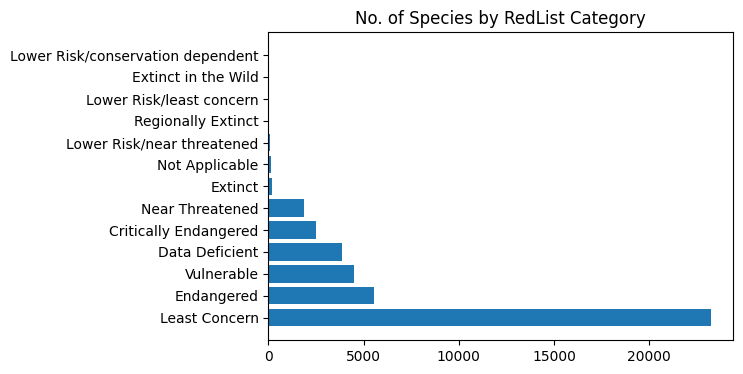

In [17]:
species_by_category = iucn_summary.groupby('redlistCategory')[['speciesName']].count().sort_values(by='speciesName', ascending=False).reset_index()

plt.figure(figsize=(6,4))
plt.barh(species_by_category['redlistCategory'],species_by_category['speciesName'])
plt.title('No. of Species by RedList Category')
plt.show()

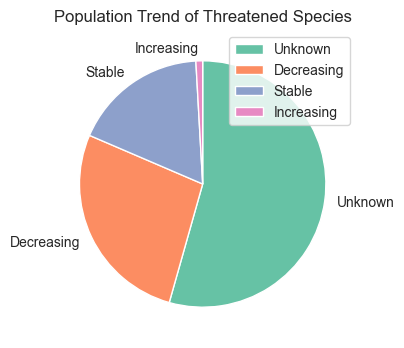

In [63]:
species_by_populationTrend = iucn_summary.groupby('populationTrend')[['speciesName']].count().sort_values(by='speciesName', ascending=False).reset_index()

plt.figure(figsize=(4,4))
plt.title('Population Trend of Threatened Species')
plt.pie(species_by_populationTrend['speciesName'],
        labels = species_by_populationTrend['populationTrend'],
        startangle=90.0,
        counterclock=False)
plt.legend()
plt.show()

In [14]:
categories_by_populationTrend = iucn_summary.set_index(['redlistCategory', 
                                                'populationTrend']).sort_index()

categories_by_populationTrend[['kingdomName',
                               'phylumName',
                               'scientificName']]

kingdomName    phylumName  \
redlistCategory       populationTrend                             
Critically Endangered Decreasing         ANIMALIA      CHORDATA   
                      Decreasing          PLANTAE  TRACHEOPHYTA   
                      Decreasing          PLANTAE  TRACHEOPHYTA   
                      Decreasing          PLANTAE  TRACHEOPHYTA   
                      Decreasing          PLANTAE  TRACHEOPHYTA   
...                                           ...           ...   
Vulnerable            NaN                 PLANTAE  TRACHEOPHYTA   
                      NaN                 PLANTAE  TRACHEOPHYTA   
                      NaN                ANIMALIA      CHORDATA   
                      NaN                 PLANTAE  TRACHEOPHYTA   
                      NaN                 PLANTAE  TRACHEOPHYTA   

                                                  scientificName  
redlistCategory       populationTrend                             
Critically Endangered Decreasing          Malacochersus tornieri  
                      Decreasing           Saintpaulia teitensis  
                      Decreasing          Impatiens simbiniensis  
                      Decreasing           Impatiens cinnabarina  
                      Decreasing                   Ochna braunii  
...                                                          ...  
Vulnerable            NaN                          Cola letestui  
                      NaN              Campylospermum amplectens  
                      NaN                       Chersobius solus  
                      NaN                    Euphorbia doloensis  
                      NaN               Chamaecrista aldabrensis  

[41949 rows x 3 columns]

## Gather data relevant to Kenya's species focus
Five species action plans were completed in 2024 and 2025 as follows:
1. 2nd edition of the Recovery and Action Plan for the Sable Antelope (Hippotragus niger) in Kenya (2024-2033), launched during the World Wildlife Day on 3rd March 2024 in Shimba Hills NR, Kwale;
2. Vultures Multi-Species Action Plan for Kenya 2024-2034, virtual launched on 6th September 2024;
3. National Recovery and Action Plan for the Pangolins in Kenya (2024-2028), virtual launch with panelists on 8th October 2024;
4. National Single Species Action Plan for the Conservation of the Grey Crowned Crane (Balearica regulorum gibbericeps) in Kenya (2025 - 2034), launched during the World Wildlife Day on 3rd March 2025 in Baringo, and 
5. National Recovery and Conservation Action Plan for the Pancake Tortoise (Malacochersus tornieri) in Kenya (2025-2035), launched during the World Endangered Species Day celebrations on 16th May 2025, in Ciakariga, Tharaka

### Species in focus:
- Sable Antelope (Hippotragus niger)
- Vultures
- Pangolins
- Grey Crowned Crane (Balearica regulorum gibbericeps)
- Pancake Tortoise (Malacochersus tornieri)

### countries

In [15]:
species_by_country = pd.read_csv(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\iucn\redlist_species_data_c2b461b8-36ca-4846-a764-b0c967489696\countries.csv")

species_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431396 entries, 0 to 431395
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   assessmentId     431396 non-null  int64 
 1   internalTaxonId  431396 non-null  int64 
 2   scientificName   431396 non-null  object
 3   code             427182 non-null  object
 4   name             431396 non-null  object
 5   presence         431396 non-null  object
 6   origin           431396 non-null  object
 7   seasonality      369694 non-null  object
 8   formerlyBred     93189 non-null   object
dtypes: int64(2), object(7)
memory usage: 29.6+ MB


In [16]:
species_by_country.head()

,assessmentId,internalTaxonId,scientificName,code,name,presence,origin,seasonality,formerlyBred
0,2554448,199057,Ilyophis blachei,IE,Ireland,Extant,Native,"[""Resident""]",Unknown
1,2554448,199057,Ilyophis blachei,GB,United Kingdom,Extant,Native,"[""Resident""]",Unknown
2,2554448,199057,Ilyophis blachei,AU,Australia,Extant,Native,"[""Resident""]",Unknown
3,2554448,199057,Ilyophis blachei,NZ,New Zealand,Extant,Native,"[""Resident""]",Unknown
4,2554448,199057,Ilyophis blachei,ID,Indonesia,Extant,Native,"[""Resident""]",Unknown


In [28]:
ke_species = species_by_country[species_by_country['name'] == 'Kenya']

ke_species.head()

,assessmentId,internalTaxonId,scientificName,code,name,presence,origin,seasonality,formerlyBred
46,2556736,199080,Myrichthys colubrinus,KE,Kenya,Extant,Native,"[""Resident""]",NaN
273,2574231,199246,Callechelys catostoma,KE,Kenya,Extant,Native,"[""Resident""]",NaN
332,2575605,199258,Ophichthus apicalis,KE,Kenya,Extant,Native,"[""Resident""]",NaN
554,2584816,199340,Callechelys marmorata,KE,Kenya,Extant,Native,"[""Resident""]",NaN
580,2585044,199341,Muraenesox bagio,KE,Kenya,Extant,Native,"[""Resident""]",Unknown


# research needed

In [29]:
species_by_research_needed = pd.read_csv(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\iucn\redlist_species_data_c2b461b8-36ca-4846-a764-b0c967489696\research_needed.csv")

species_by_research_needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82263 entries, 0 to 82262
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   assessmentId     82263 non-null  int64  
 1   internalTaxonId  82263 non-null  int64  
 2   scientificName   82263 non-null  object 
 3   code             82263 non-null  float64
 4   name             82263 non-null  object 
 5   note             3305 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.8+ MB


In [30]:
species_by_research_needed['name'].unique()

array(['Life history & ecology', 'Taxonomy',
       'Population size, distribution & trends', 'Threats',
       'Harvest, use & livelihoods', 'Habitat trends', 'Actions',
       'Population trends', 'Harvest level trends', 'Trade trends',
       'Species Action/Recovery Plan', 'Area-based Management Plan',
       'Other', 'Harvest & Trade Management Plan', 'Research',
       'Conservation Planning', 'Monitoring'], dtype=object)

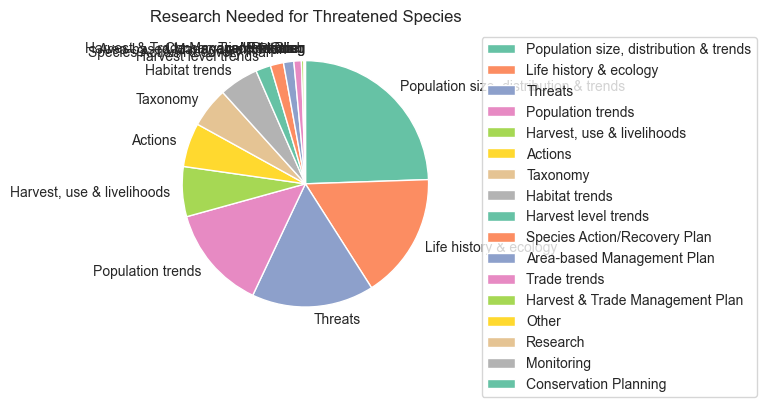

In [62]:
research_needed = species_by_research_needed.groupby('name')[['scientificName']].count().sort_values(by='scientificName', ascending=False).reset_index()

plt.figure(figsize=(12,4))
plt.title('Research Needed for Threatened Species')
plt.pie(research_needed['scientificName'],
        labels = research_needed['name'],
        startangle=90.0,
        counterclock=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()